In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [265]:
run_id = 'SP500_5Predictors_Horizon40'

In [266]:
os.mkdir(run_id)

In [267]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [268]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [269]:
predict = DataLoader('^GSPC', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [270]:
predict_req, real = data_prep(predict, 20, 40) # dividing data into predictor input and real data

### Individual predictor forecasts

In [271]:
individual_predictors_forecasts = individual_predictors_pretrained_SP500_40_5(predict_req, 40)

### System disagreement between individual predictor forecasts

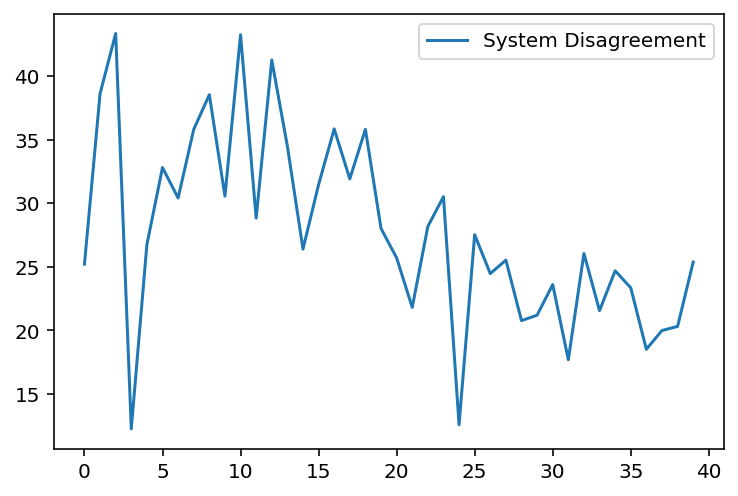

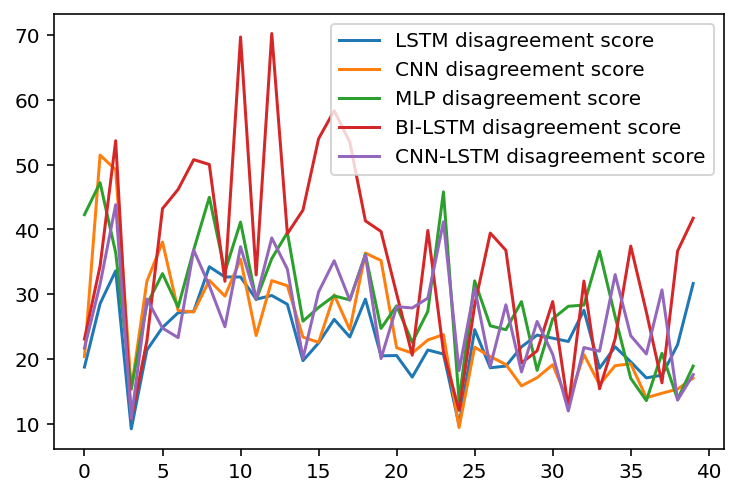

In [272]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [273]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [274]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [275]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Correcting,Correcting Memory,Real Value,LSTM,CNN,MLP,BI-LSTM,CNN-LSTM,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score
Date,,,,,,,,,,,,,,,,,,,
2018-03-02,2750.123730,2750.123730,2750.123730,2750.123730,2775.899920,2750.123730,2750.123730,2691.250000,2738.724121,2730.656250,2792.392578,2760.383545,2728.462158,25.214102,18.731543,20.345117,42.268848,23.063428,21.661572
2018-03-05,2734.465137,2731.328526,2732.896831,2716.247559,2730.897974,2675.866901,2705.166019,2720.939941,2731.208496,2682.990234,2781.670654,2760.208740,2716.247559,38.611523,28.528320,51.474902,47.205518,34.328369,31.520508
2018-03-06,2741.421680,2738.682876,2739.572241,2701.201904,2741.141643,2727.869346,2717.330776,2728.120117,2752.266602,2692.222656,2766.308350,2795.108887,2701.201904,43.340625,33.598535,49.199023,36.406885,53.687207,43.811475
2018-03-07,2744.316797,2743.875720,2743.701454,2744.381348,2727.227063,2731.423128,2723.115931,2726.800049,2744.381348,2729.013916,2759.718018,2751.878662,2736.592041,12.271172,9.198145,15.302881,15.401221,10.697607,10.756006
2018-03-08,2741.451953,2737.789464,2739.691041,2709.475586,2744.521939,2723.903093,2720.911369,2738.969971,2753.419189,2709.475586,2769.841064,2760.490479,2714.033447,26.750078,21.364502,31.976367,28.389111,22.778760,29.241650
2018-03-09,2740.046631,2740.037158,2738.144165,2723.987061,2744.942278,2737.570336,2722.501743,2786.570068,2723.987061,2702.005371,2766.527100,2783.251953,2724.461670,32.805312,24.852246,38.041260,33.170410,43.205322,24.757324
2018-03-12,2754.192139,2758.503356,2753.405632,2800.364258,2761.912063,2800.995266,2745.805789,2783.020020,2727.294922,2726.711914,2770.051025,2800.364258,2746.538574,30.409727,27.130420,27.480225,27.984180,46.172119,23.281689
2018-03-13,2747.212598,2750.611435,2746.522269,2774.781250,2754.979810,2775.947302,2743.437334,2765.310059,2726.171875,2726.708496,2774.781250,2797.982422,2710.418945,35.797812,27.341895,27.234570,36.849121,50.769824,36.793652
2018-03-14,2744.705078,2747.509101,2744.343629,2786.283203,2747.658280,2762.752120,2743.324316,2749.479980,2710.476807,2713.984131,2786.283203,2794.727539,2718.053711,38.528086,34.228271,32.123877,44.955859,50.022461,31.309961


In [276]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [277]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,CNN-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score,System Disagreement
Date,,,,,,,,,,,,,,,,,,
2018-03-02,47.474121,39.406250,101.142578,69.133545,37.212158,58.873730,58.873730,58.873730,58.873730,84.649920,58.873730,58.873730,18.731543,20.345117,42.268848,23.063428,21.661572,25.214102
2018-03-05,10.268555,37.949707,60.730713,39.268799,4.692383,13.525195,10.388584,11.956890,4.692383,9.958032,45.073041,15.773923,28.528320,51.474902,47.205518,34.328369,31.520508,38.611523
2018-03-06,24.146484,35.897461,38.188232,66.988770,26.918213,13.301562,10.562758,11.452124,26.918213,13.021526,0.250772,10.789341,33.598535,49.199023,36.406885,53.687207,43.811475,43.340625
2018-03-07,17.581299,2.213867,32.917969,25.078613,9.791992,17.516748,17.075671,16.901405,17.581299,0.427014,4.623080,3.684118,9.198145,15.302881,15.401221,10.697607,10.756006,12.271172
2018-03-08,14.449219,29.494385,30.871094,21.520508,24.936523,2.481982,1.180507,0.721071,29.494385,5.551968,15.066878,18.058602,21.364502,31.976367,28.389111,22.778760,29.241650,26.750078
2018-03-09,62.583008,84.564697,20.042969,3.318115,62.108398,46.523438,46.532910,48.425903,62.583008,41.627790,48.999732,64.068325,24.852246,38.041260,33.170410,43.205322,24.757324,32.805312
2018-03-12,55.725098,56.308105,12.968994,17.344238,36.481445,28.827881,24.516664,29.614388,17.344238,21.107957,17.975246,37.214230,27.130420,27.480225,27.984180,46.172119,23.281689,30.409727
2018-03-13,39.138184,38.601562,9.471191,32.672363,54.891113,18.097461,14.698624,18.787790,9.471191,10.330248,10.637243,21.872724,27.341895,27.234570,36.849121,50.769824,36.793652,35.797812
2018-03-14,39.003174,35.495850,36.803223,45.247559,31.426270,4.774902,1.970880,5.136351,36.803223,1.821700,13.272139,6.155664,34.228271,32.123877,44.955859,50.022461,31.309961,38.528086


In [278]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,CNN-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score,System Disagreement
LSTM absolute error,1.000000,0.938143,0.893850,0.871239,0.944794,0.954063,0.954809,0.955569,0.926359,0.938976,0.362061,0.847069,-0.465615,-0.401313,-0.436784,-0.153722,-0.086976,-0.351550
CNN absolute error,0.938143,1.000000,0.851831,0.820643,0.948816,0.930039,0.934358,0.932288,0.935447,0.917888,0.299837,0.728121,-0.440082,-0.471207,-0.524425,-0.230681,-0.172868,-0.433645
MLP absolute error,0.893850,0.851831,1.000000,0.910404,0.847153,0.957069,0.956518,0.954839,0.881931,0.948532,0.313571,0.749065,-0.474833,-0.463829,-0.350688,-0.308273,-0.113854,-0.414947
BI-LSTM absolute error,0.871239,0.820643,0.910404,1.000000,0.862749,0.934660,0.930332,0.931710,0.882494,0.930002,0.321059,0.778139,-0.320610,-0.373079,-0.440388,0.035213,-0.038017,-0.238087
CNN-LSTM absolute error,0.944794,0.948816,0.847153,0.862749,1.000000,0.937012,0.939697,0.939021,0.944502,0.923518,0.336491,0.779669,-0.445327,-0.456097,-0.534058,-0.137196,-0.239775,-0.409960
Average absolute error,0.954063,0.930039,0.957069,0.934660,0.937012,1.000000,0.999514,0.999910,0.939395,0.985490,0.355497,0.805225,-0.499968,-0.506959,-0.509666,-0.213038,-0.188259,-0.444440
NoMemory absolute error,0.954809,0.934358,0.956518,0.930332,0.939697,0.999514,1.000000,0.999552,0.943089,0.984981,0.352428,0.798543,-0.505522,-0.513966,-0.515316,-0.225679,-0.197702,-0.455312
Memory absolute error,0.955569,0.932288,0.954839,0.931710,0.939021,0.999910,0.999552,1.000000,0.940615,0.985560,0.356157,0.805525,-0.501097,-0.510371,-0.510947,-0.213874,-0.192038,-0.446870
Focus absolute error,0.926359,0.935447,0.881931,0.882494,0.944502,0.939395,0.943089,0.940615,1.000000,0.940492,0.393676,0.816469,-0.476321,-0.470241,-0.512845,-0.164749,-0.201400,-0.416151
Anchor absolute error,0.938976,0.917888,0.948532,0.930002,0.923518,0.985490,0.984981,0.985560,0.940492,1.000000,0.383625,0.824216,-0.473195,-0.485459,-0.450776,-0.170793,-0.161241,-0.398895


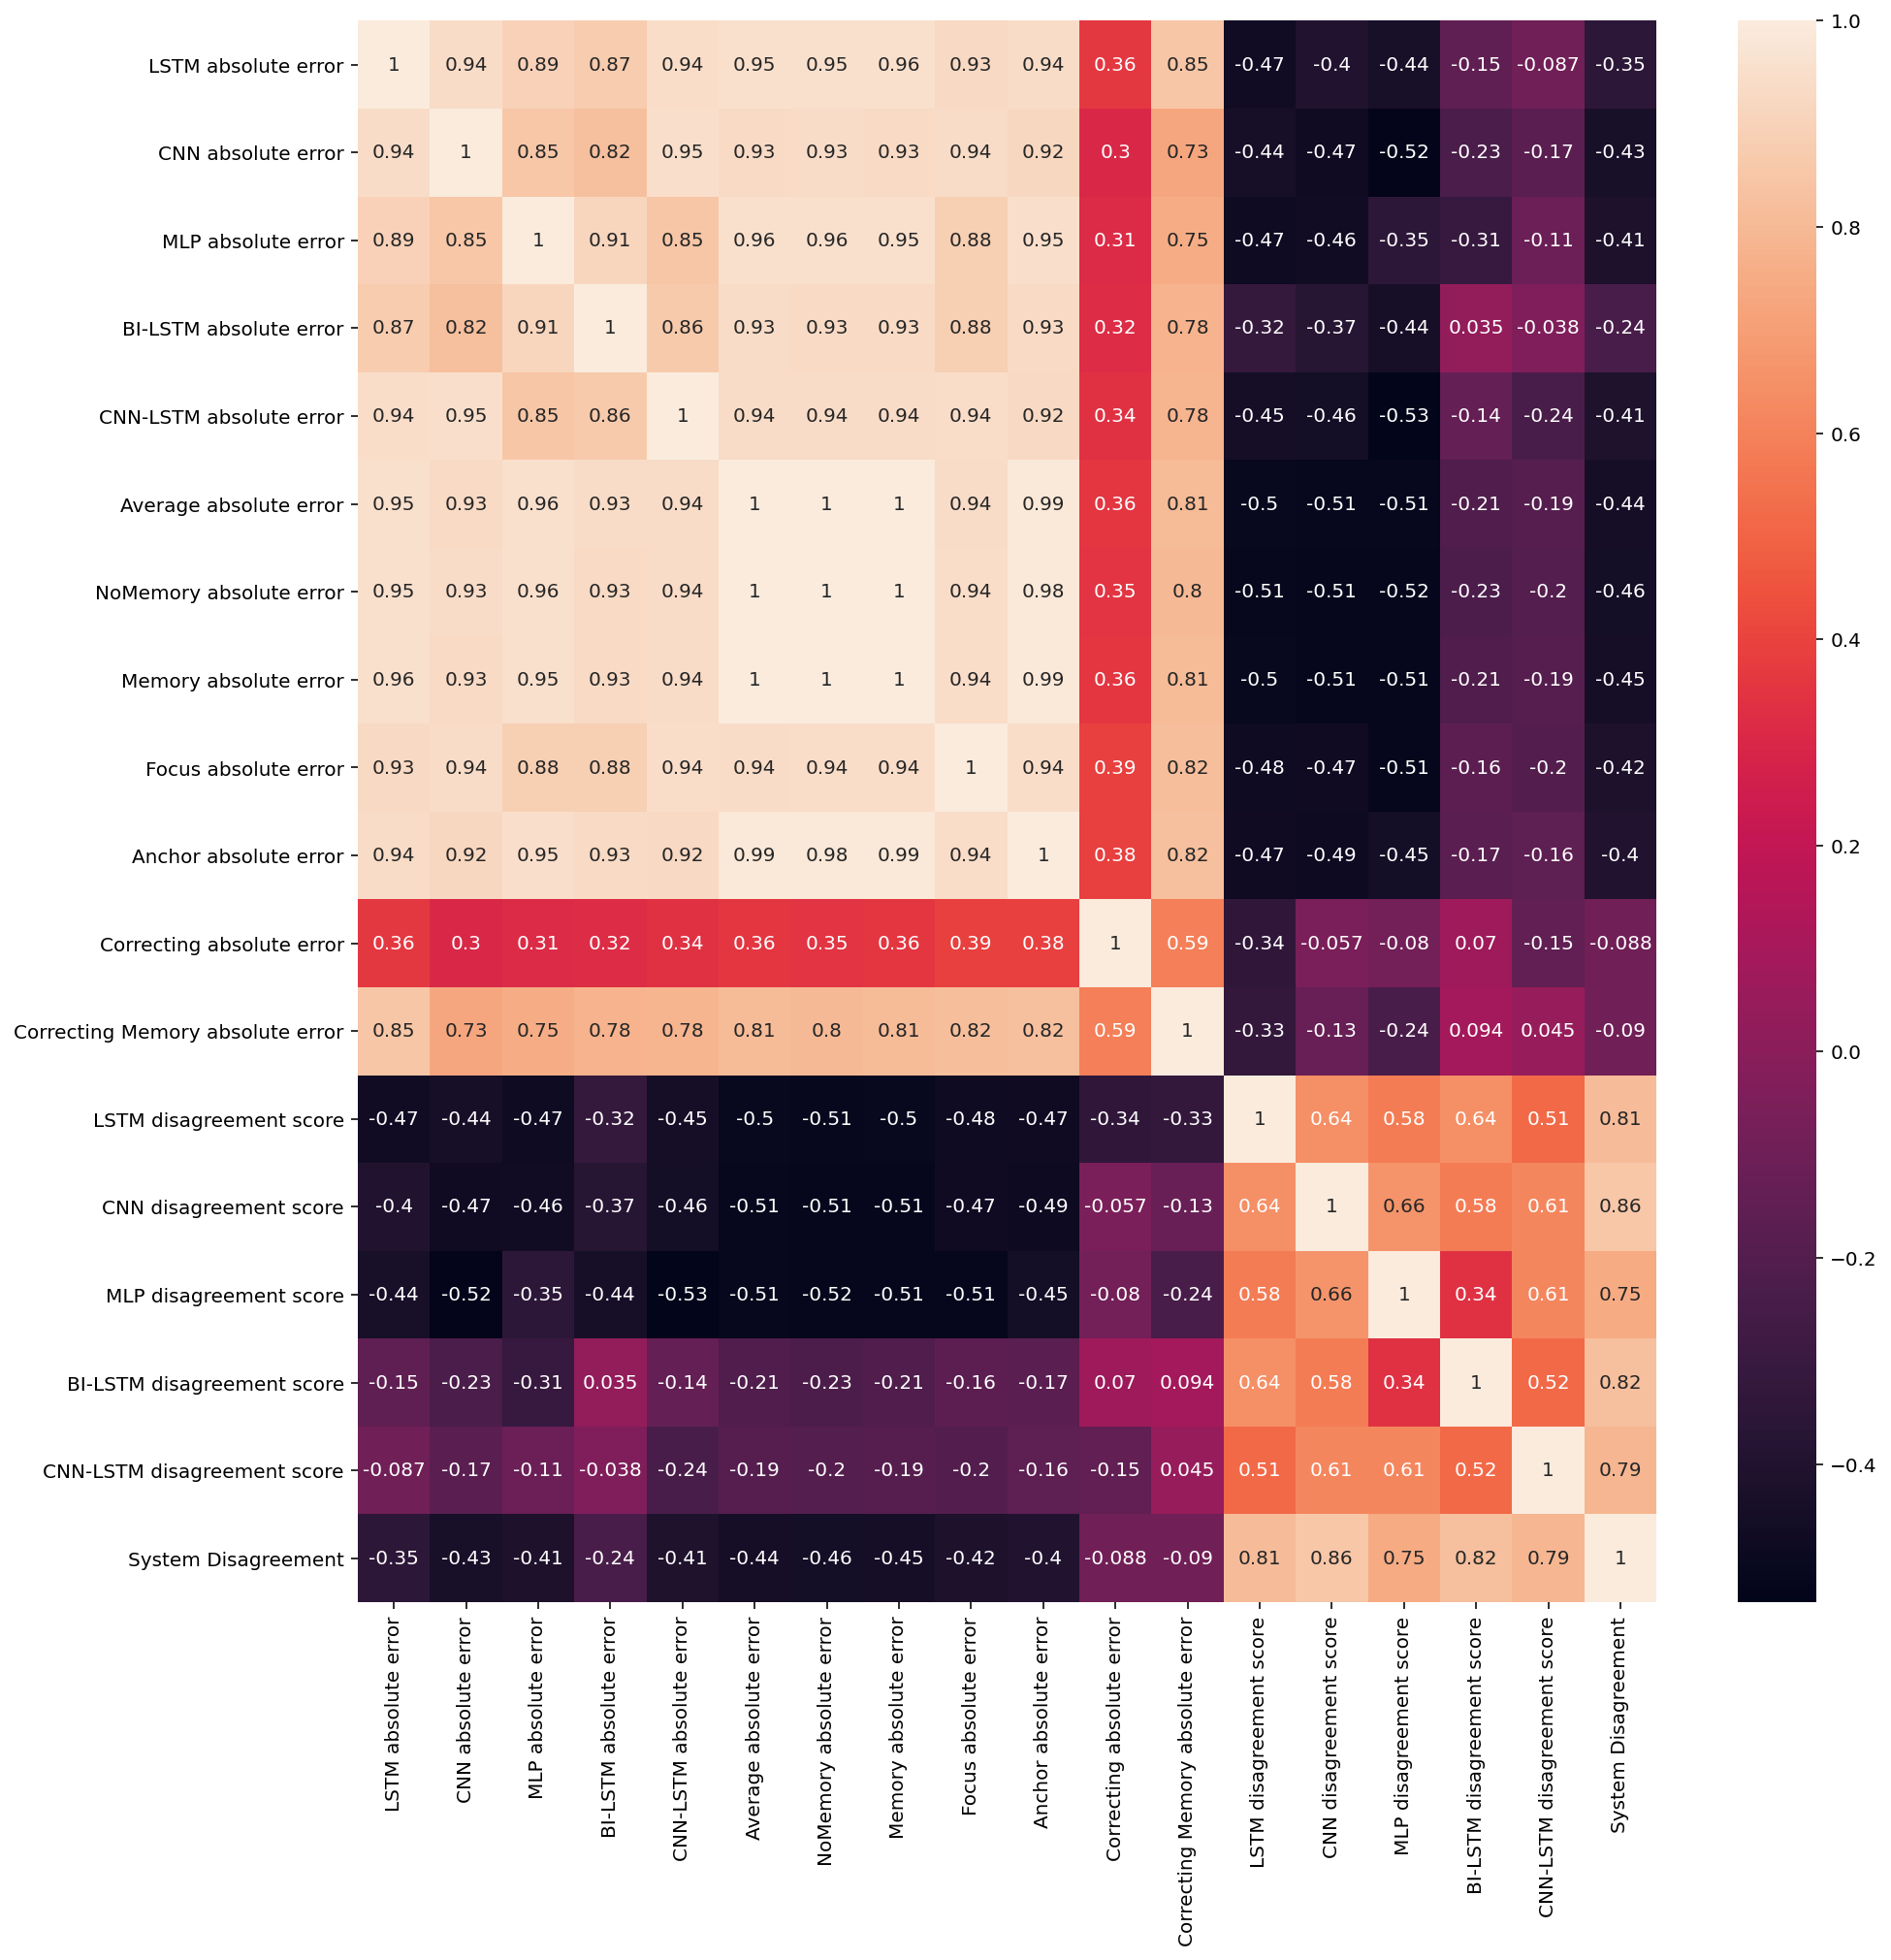

In [279]:
correlation_ = correlation(prediction_error, True)
correlation_

In [280]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MSE,  MSE log and MAE scores

,Algorithms,MSE
0,Average,10078.417127
1,NoMemory,9859.264925
2,Memory,9904.104701
3,Focus,6873.606089
4,Anchor,7528.734562
5,Correcting,1116.668092
6,Correcting Memory,4117.134281
7,LSTM,8250.314539
8,CNN,8790.858655
9,MLP,13735.230145


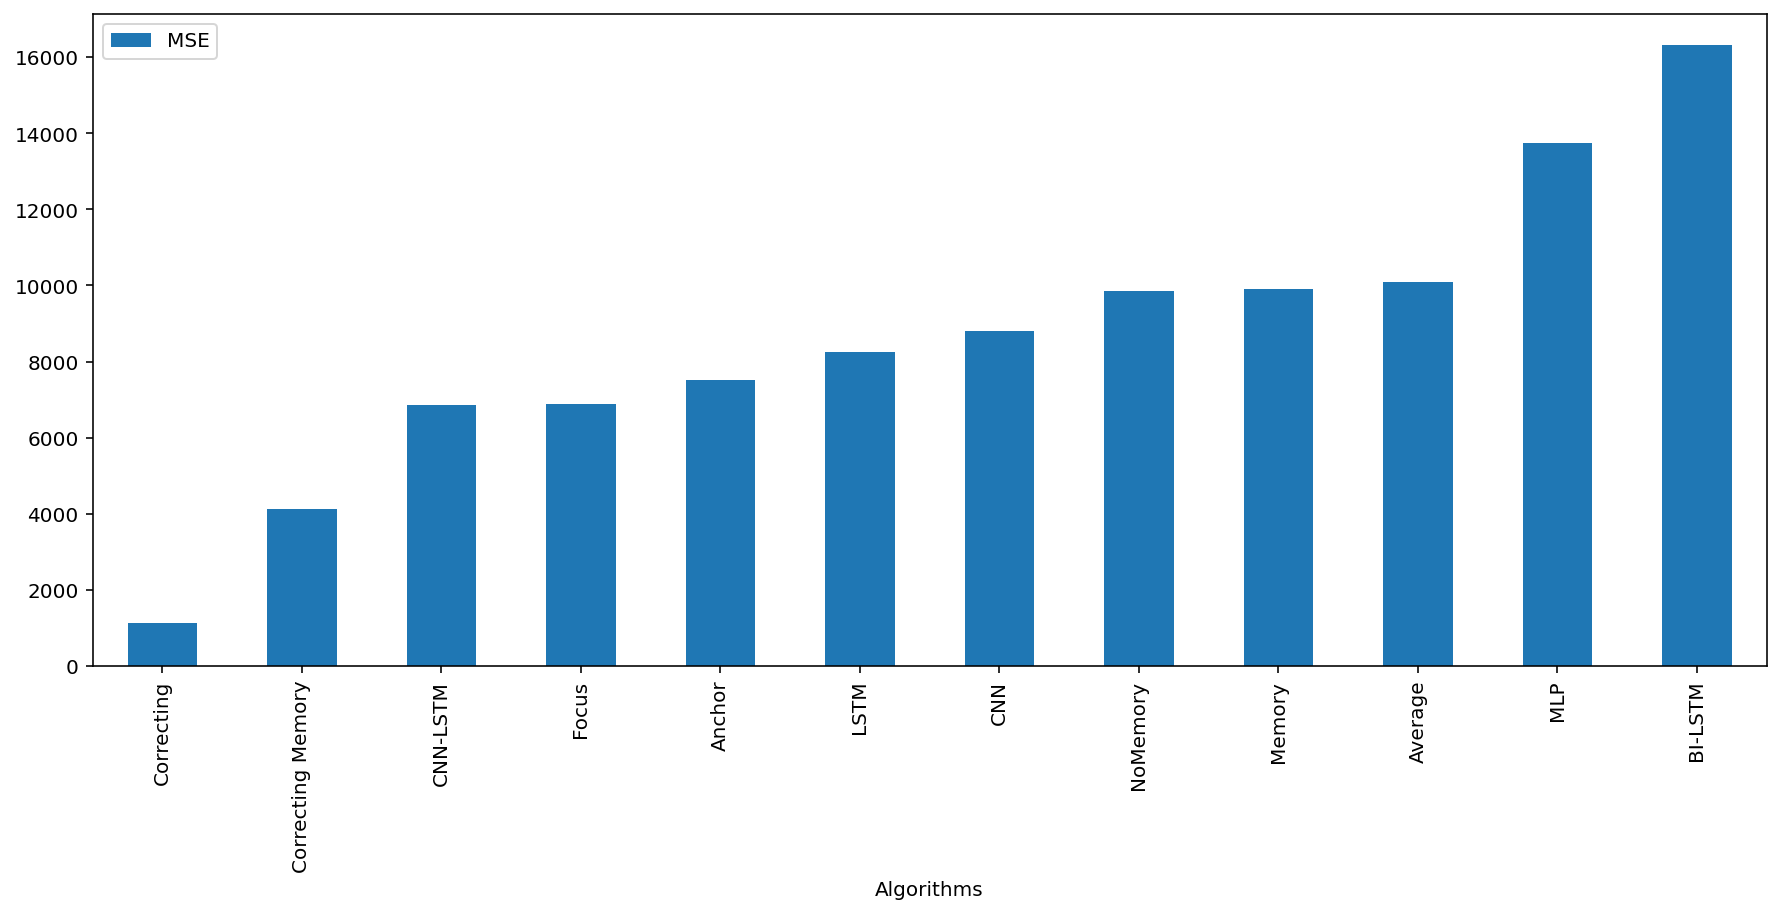

In [281]:
mse = mse_score(all_forecasts, True)
mse

In [282]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.001383
1,NoMemory,0.001353
2,Memory,0.001359
3,Focus,0.000951
4,Anchor,0.001039
5,Correcting,0.000158
6,Correcting Memory,0.000575
7,LSTM,0.001137
8,CNN,0.001208
9,MLP,0.001868


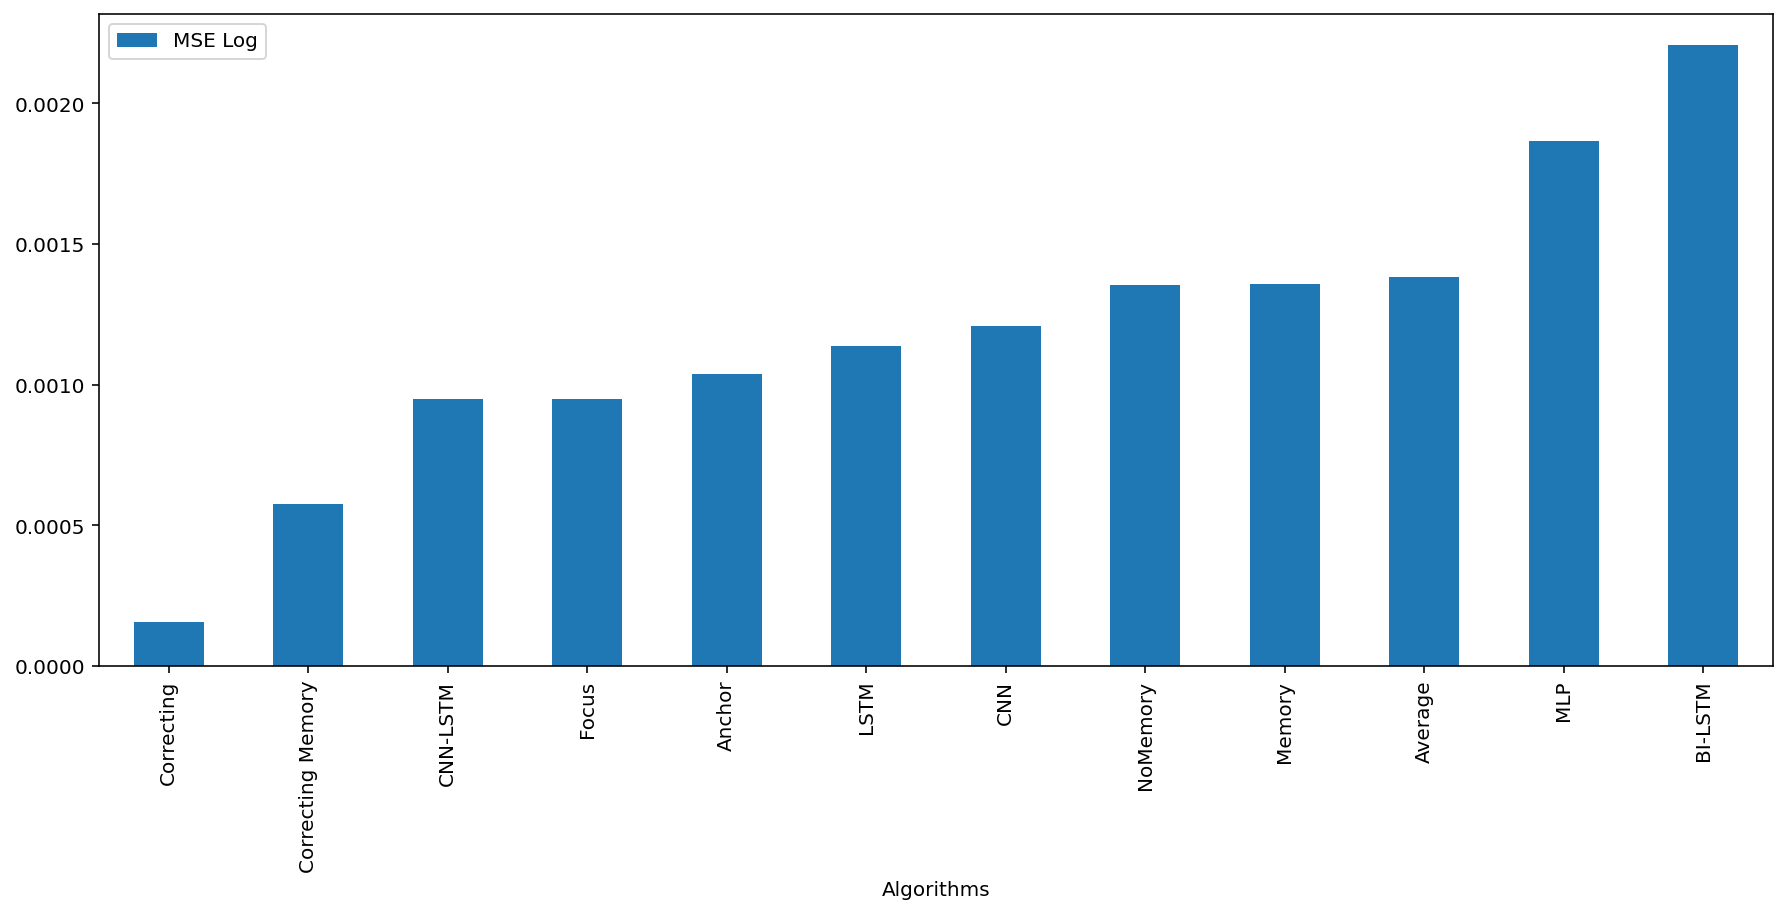

In [283]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [284]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,85.079678
1,NoMemory,83.473116
2,Memory,84.258455
3,Focus,71.096868
4,Anchor,73.217235
5,Correcting,24.989607
6,Correcting Memory,50.267747
7,LSTM,78.147498
8,CNN,82.169562
9,MLP,103.751843


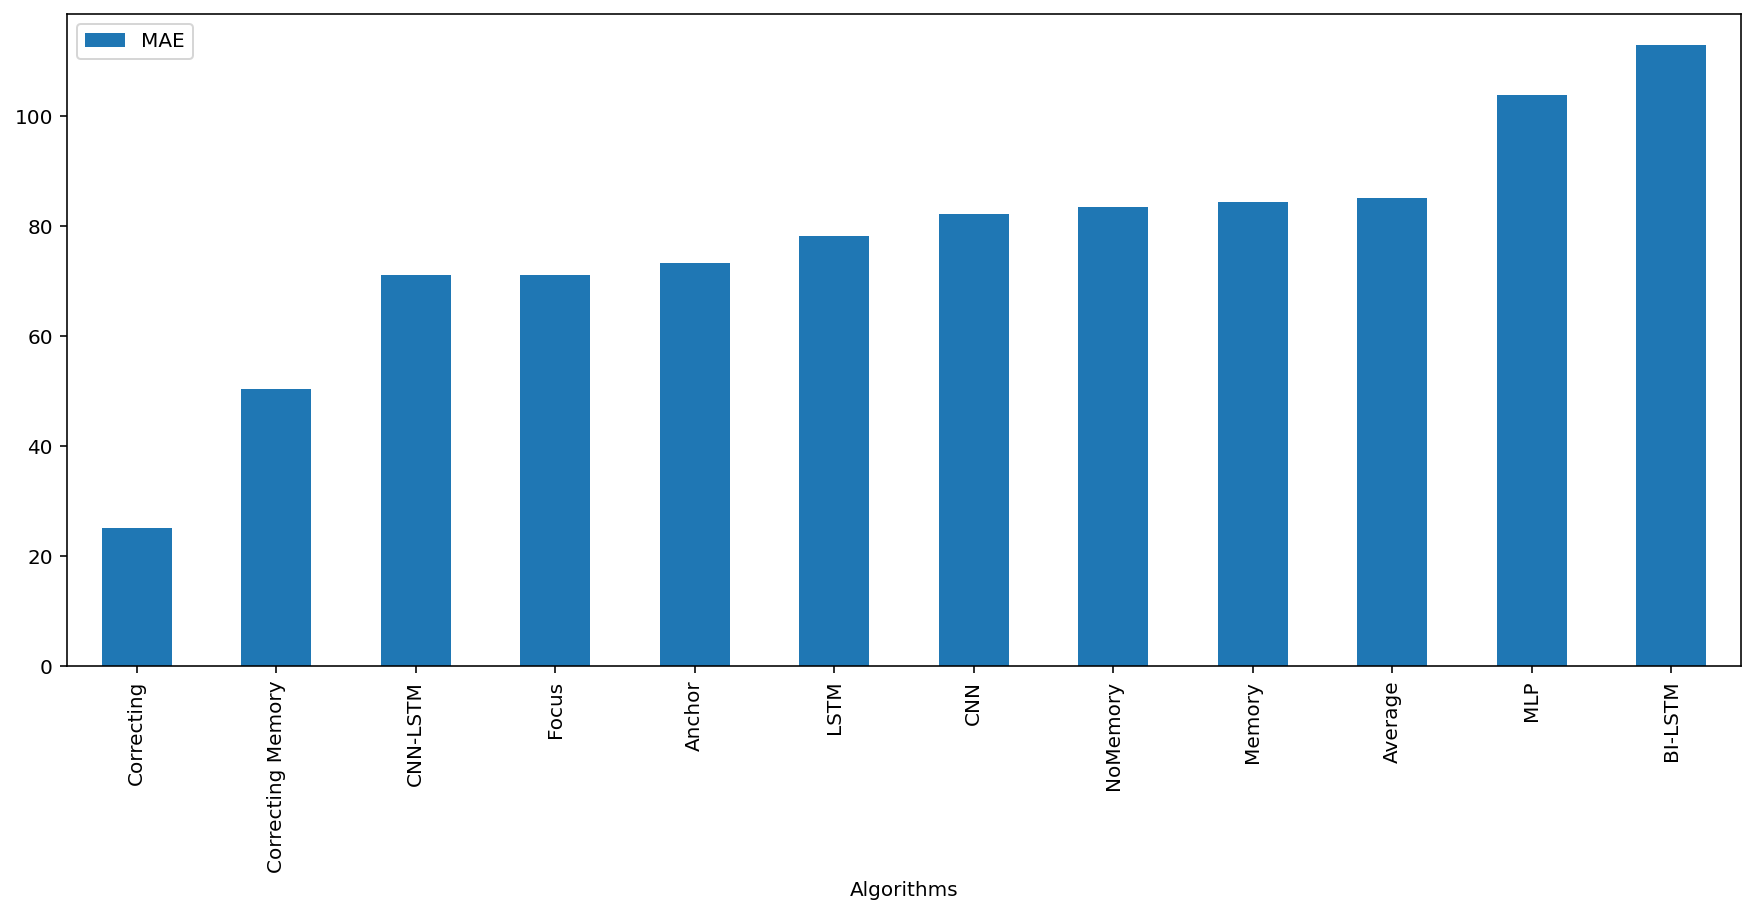

In [285]:
mae = mae_score(all_forecasts, True)
mae

In [286]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

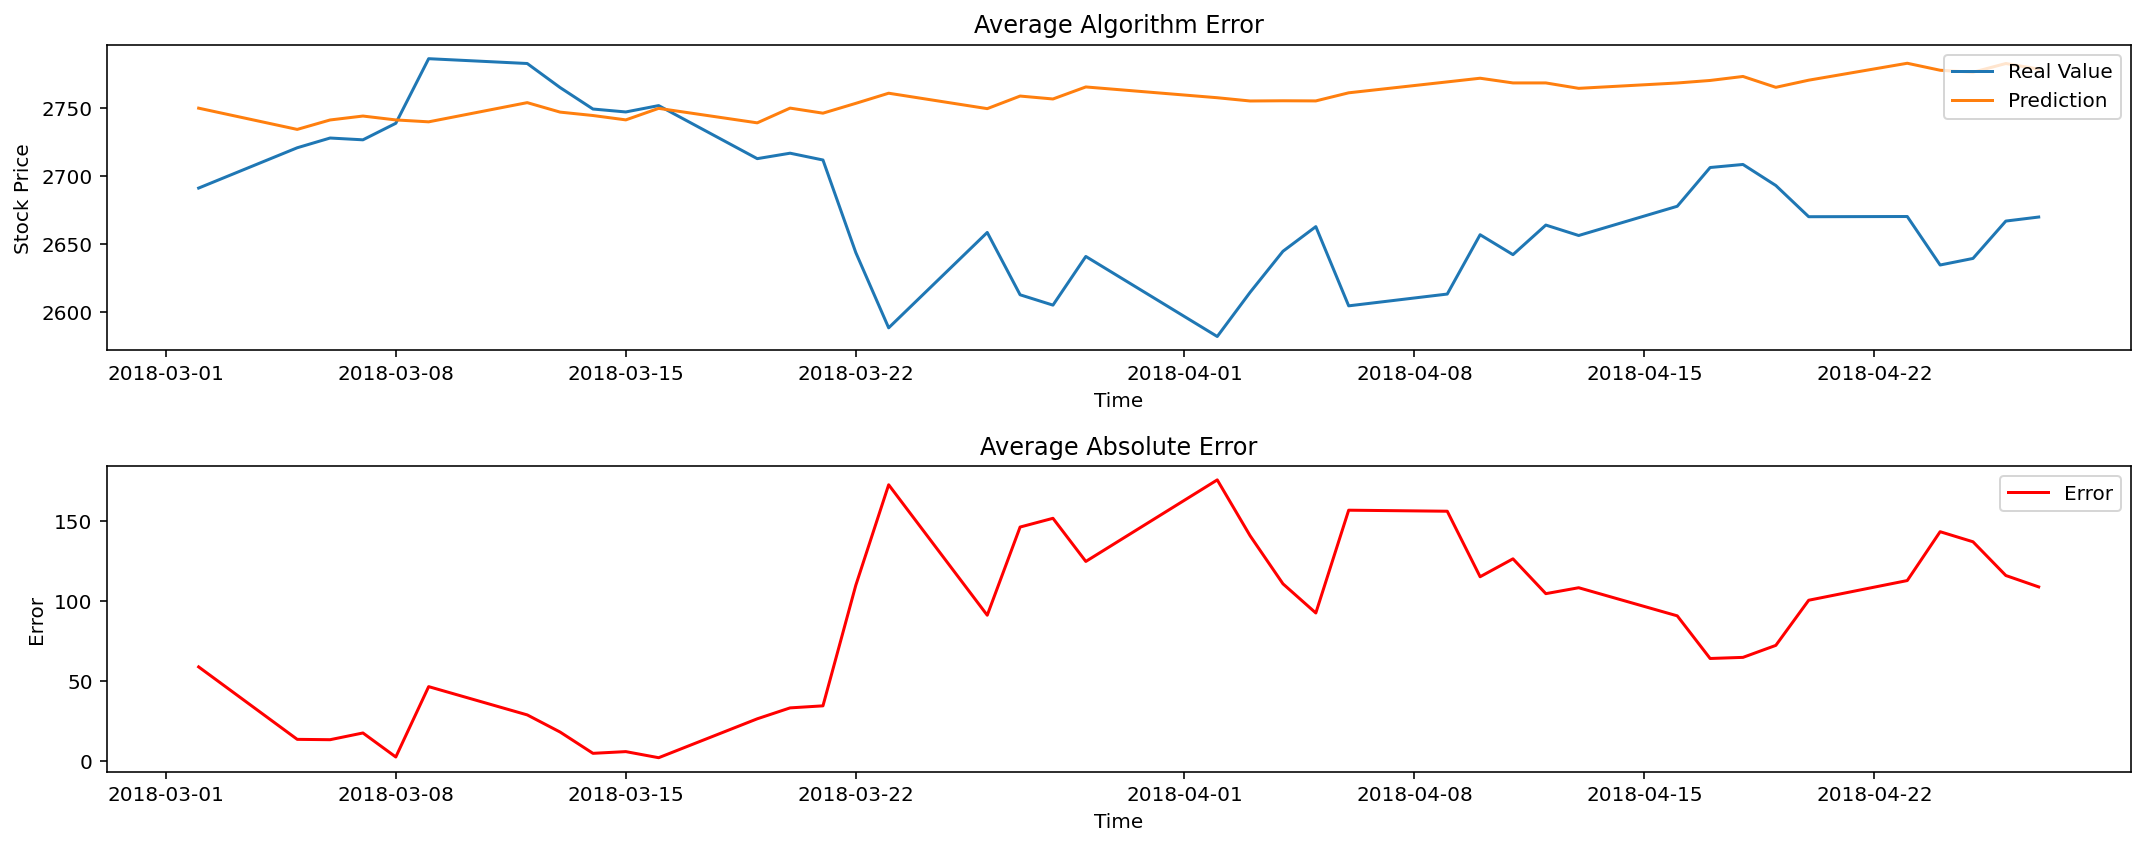

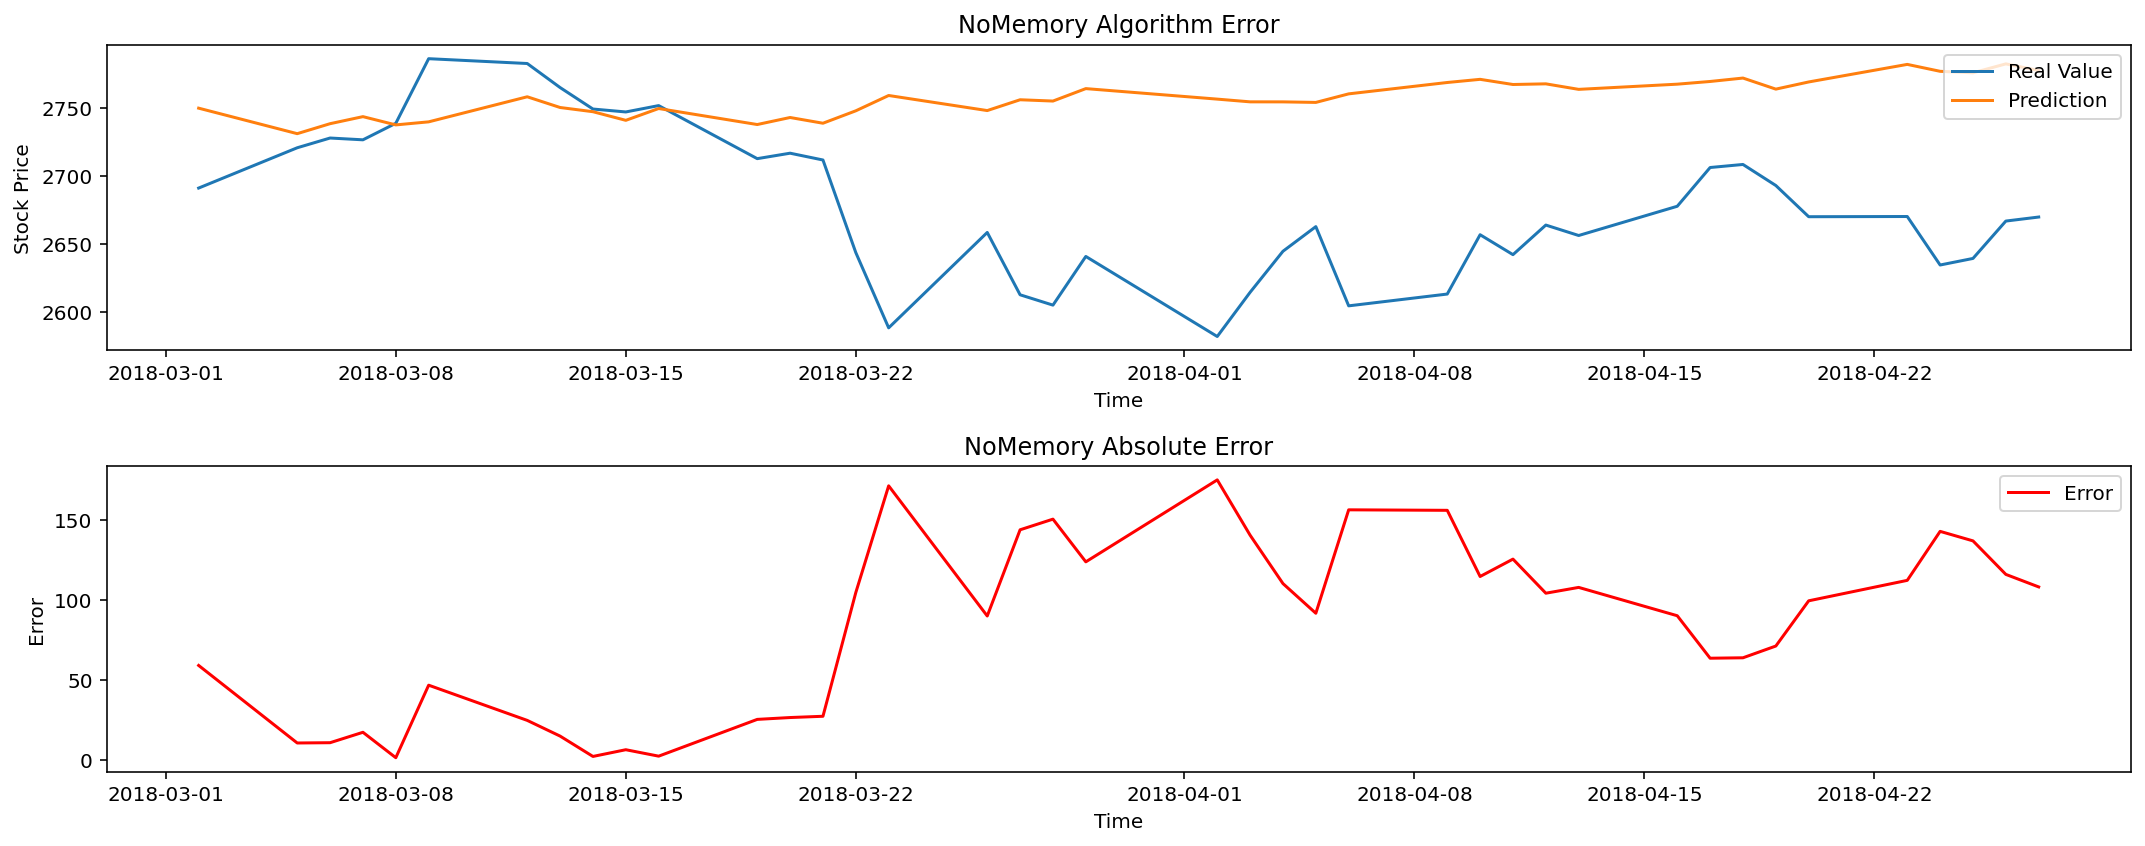

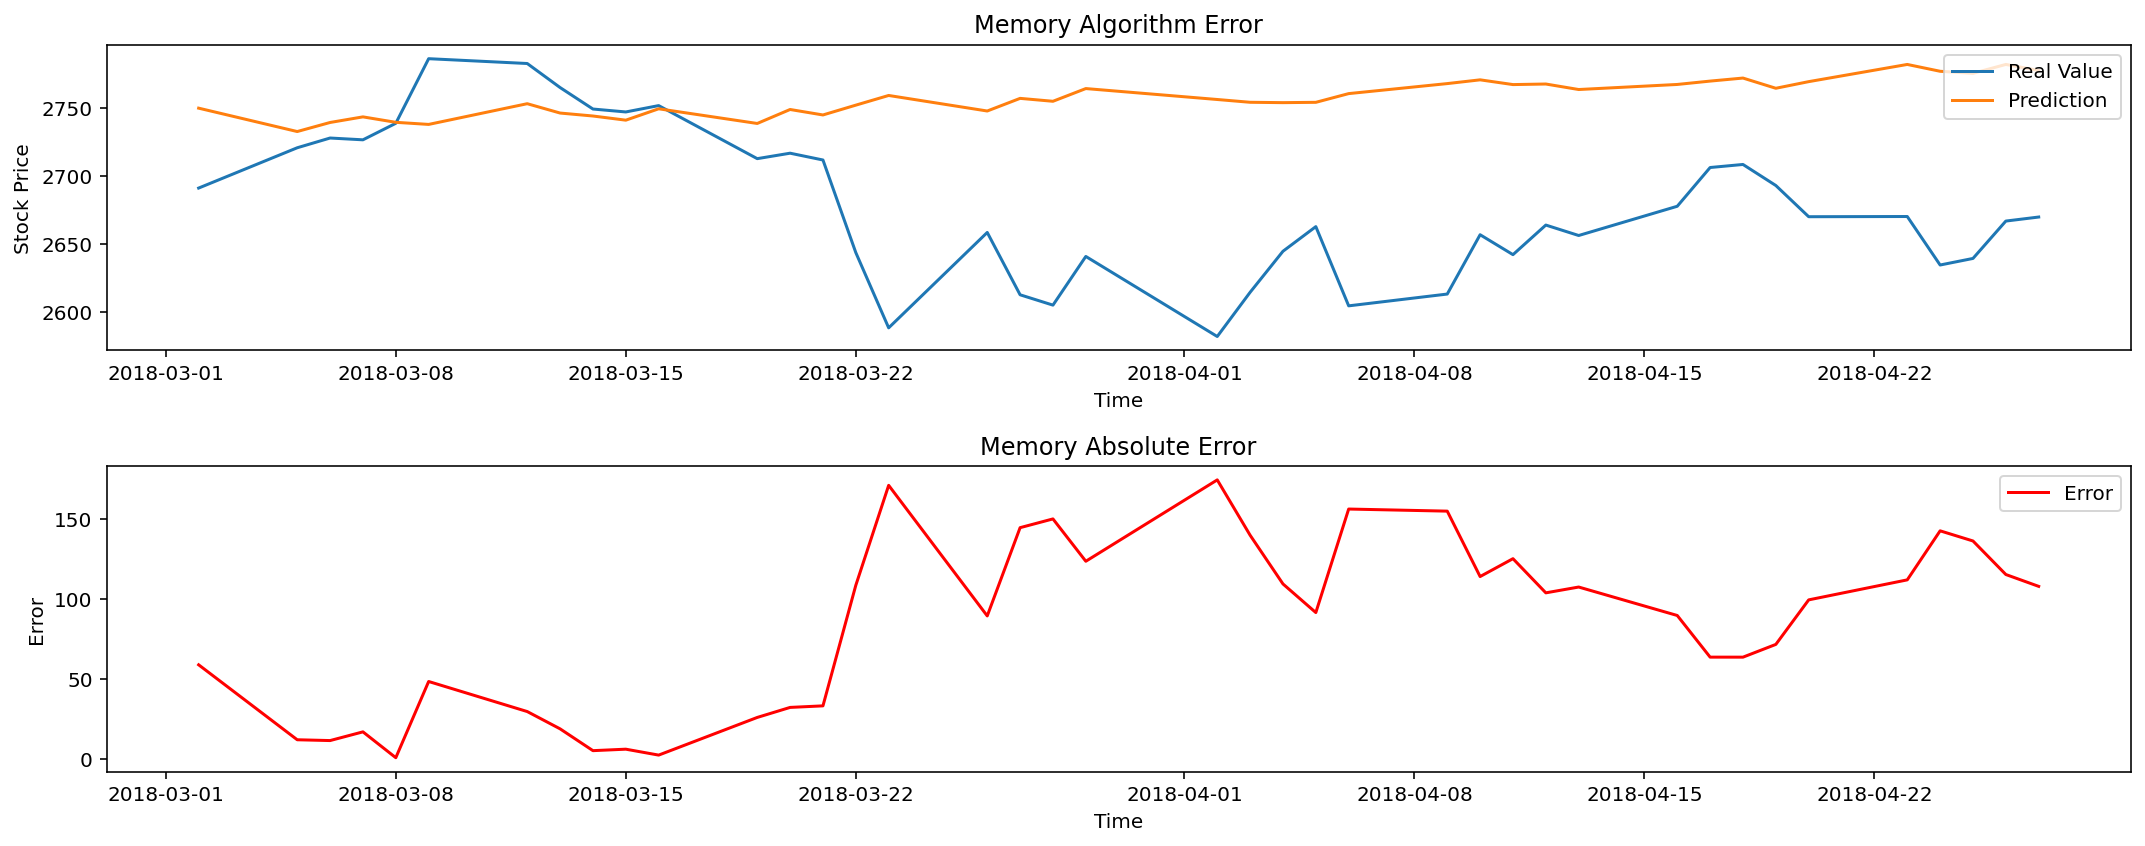

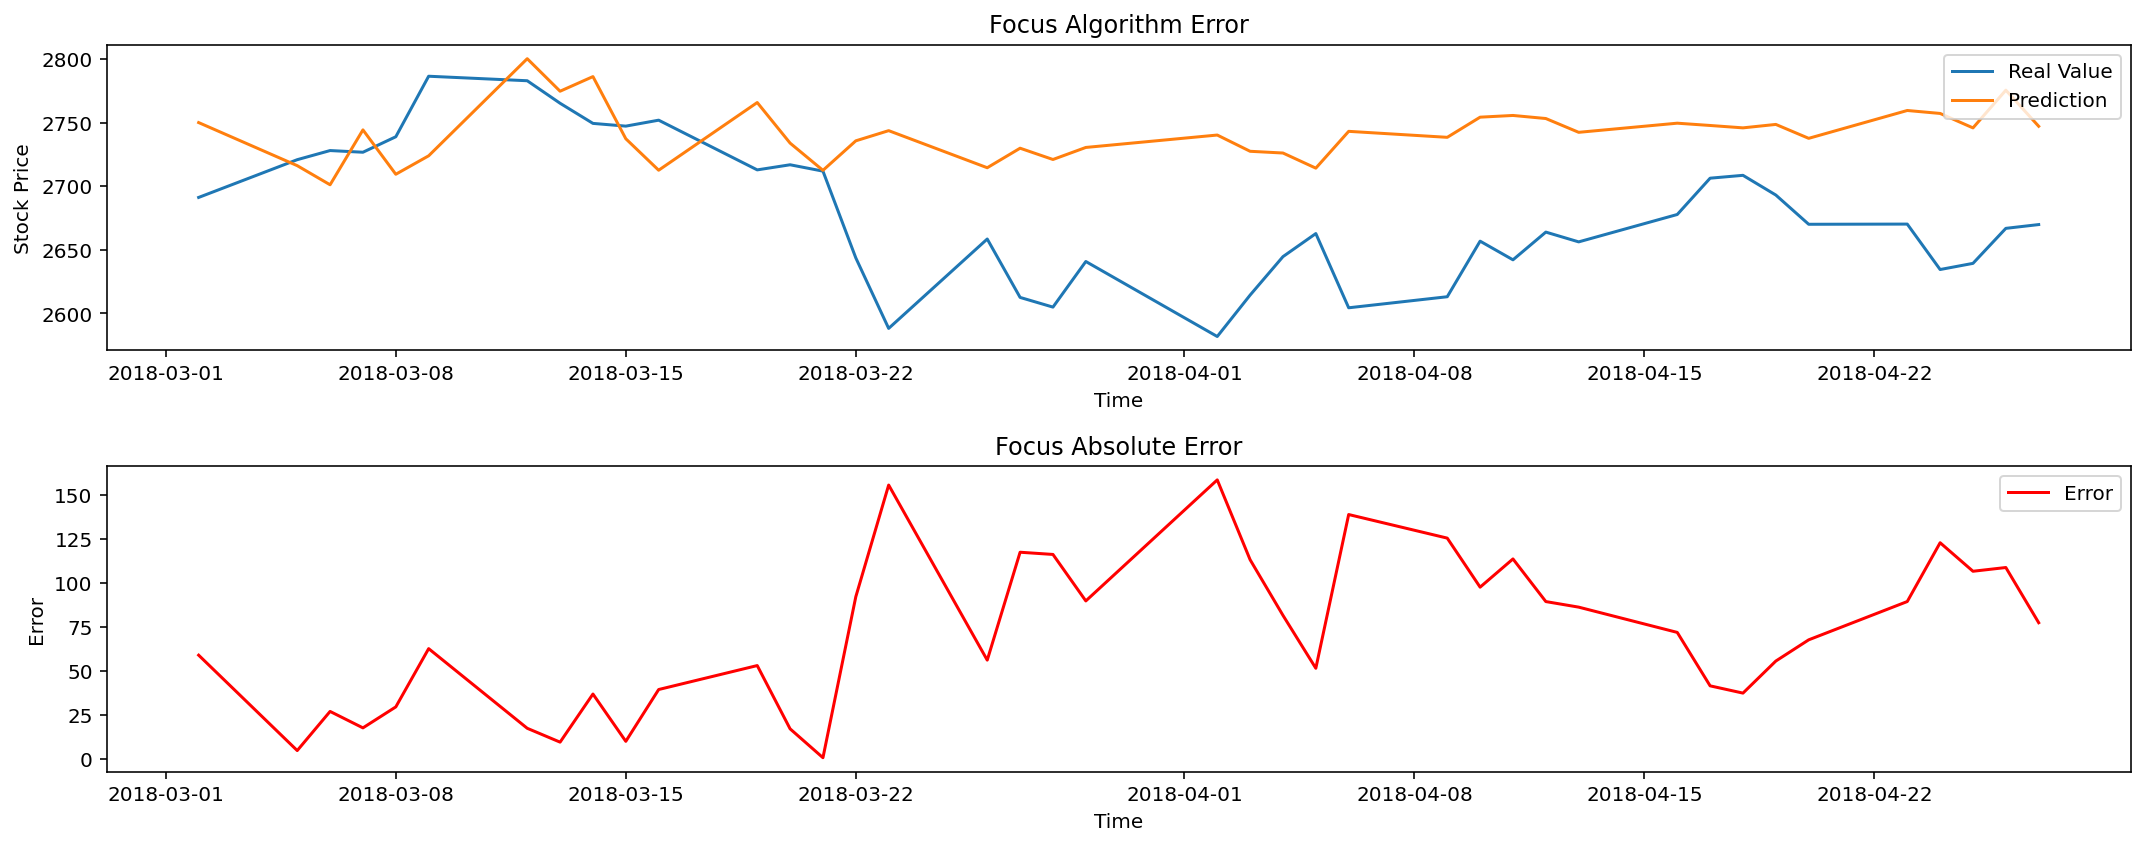

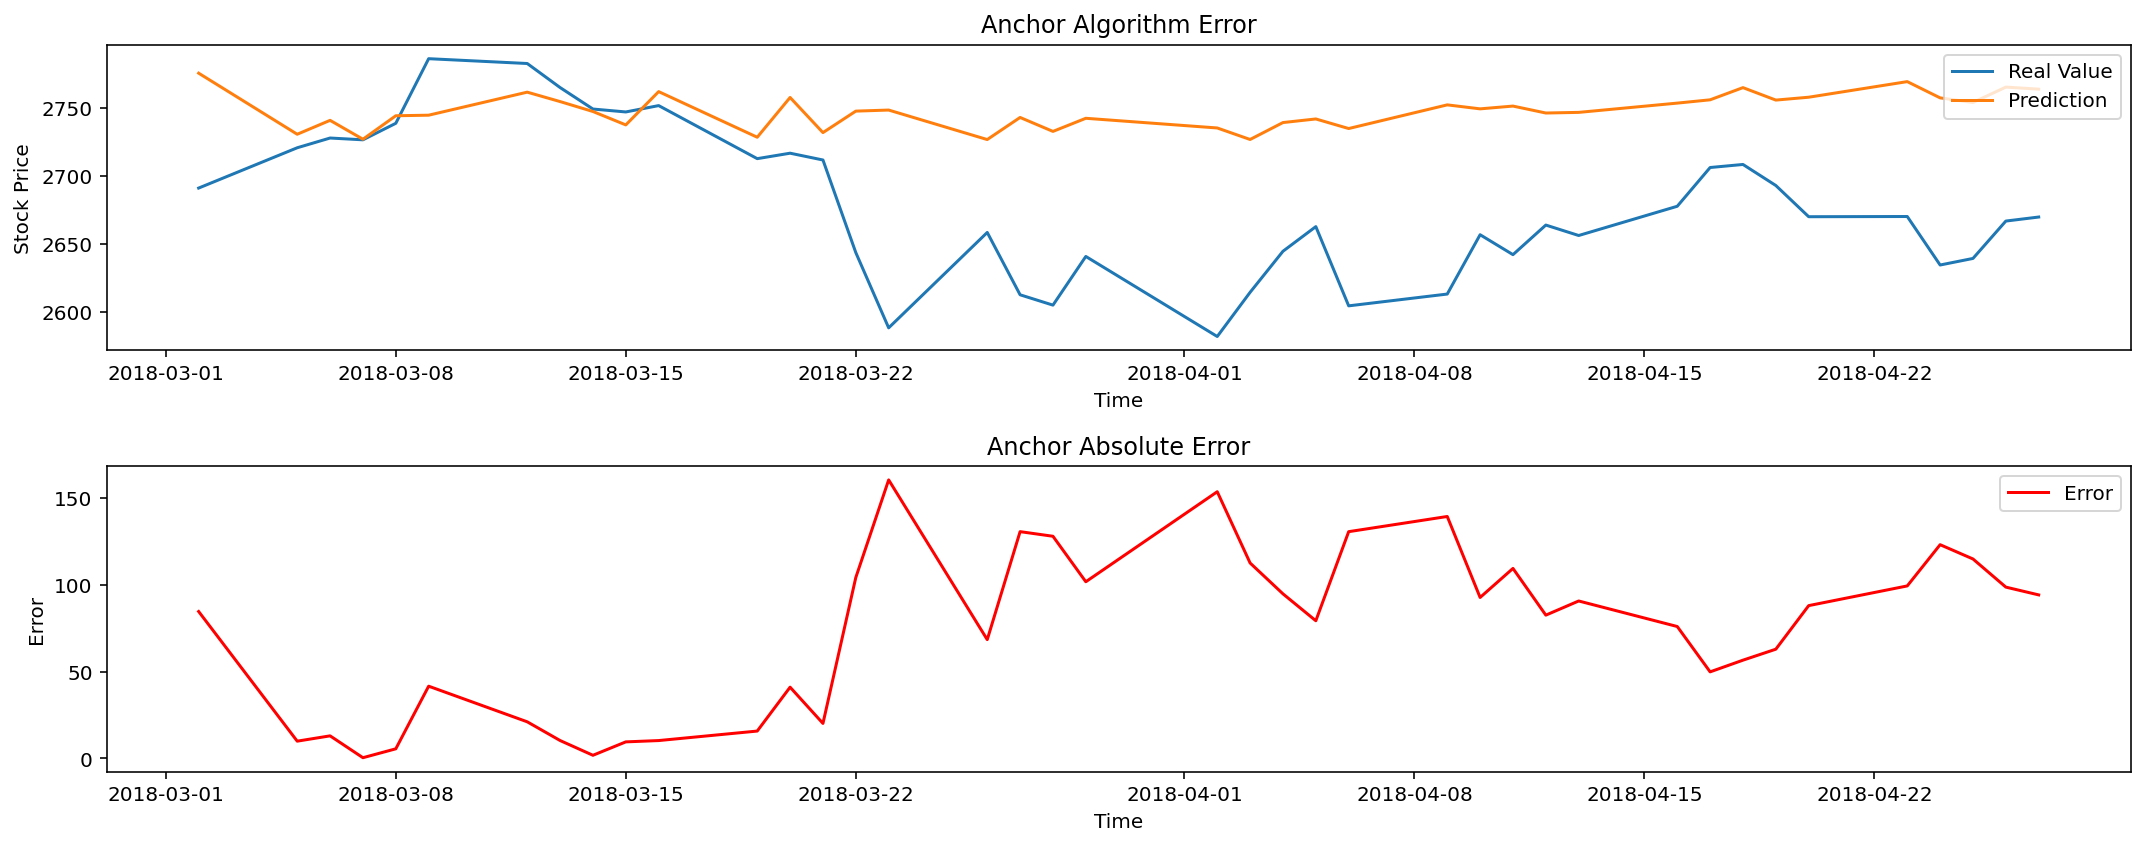

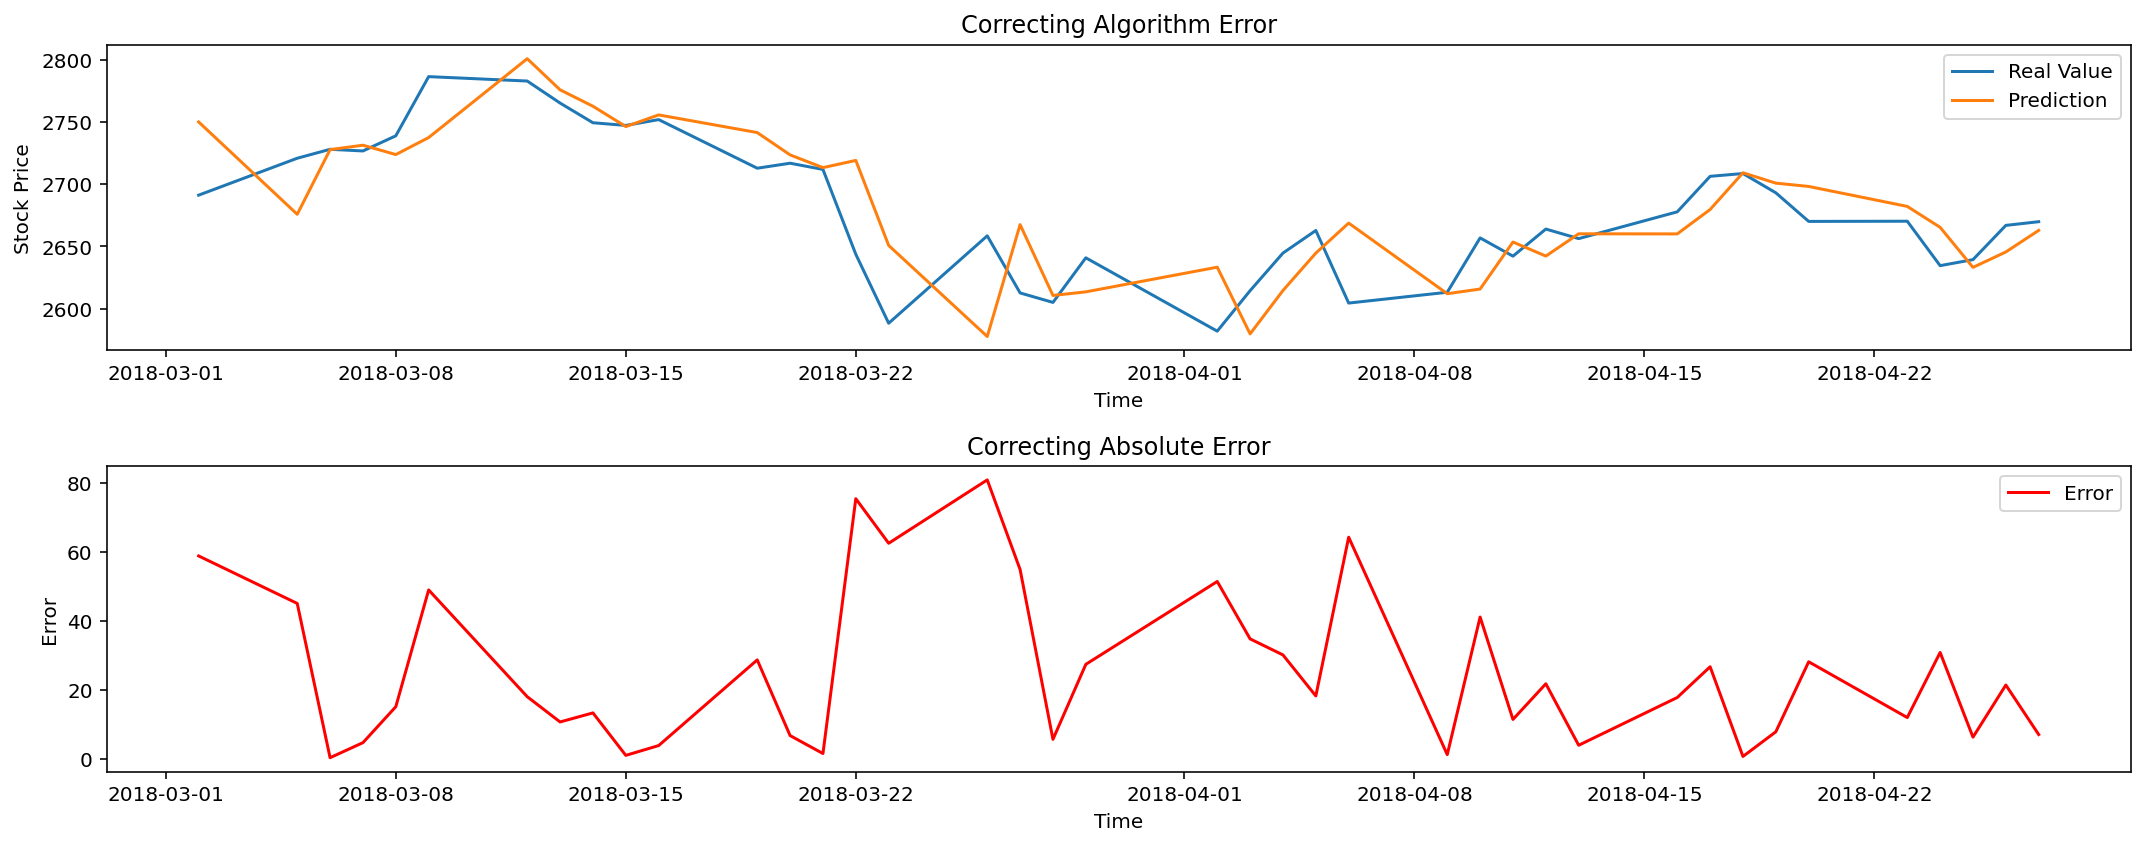

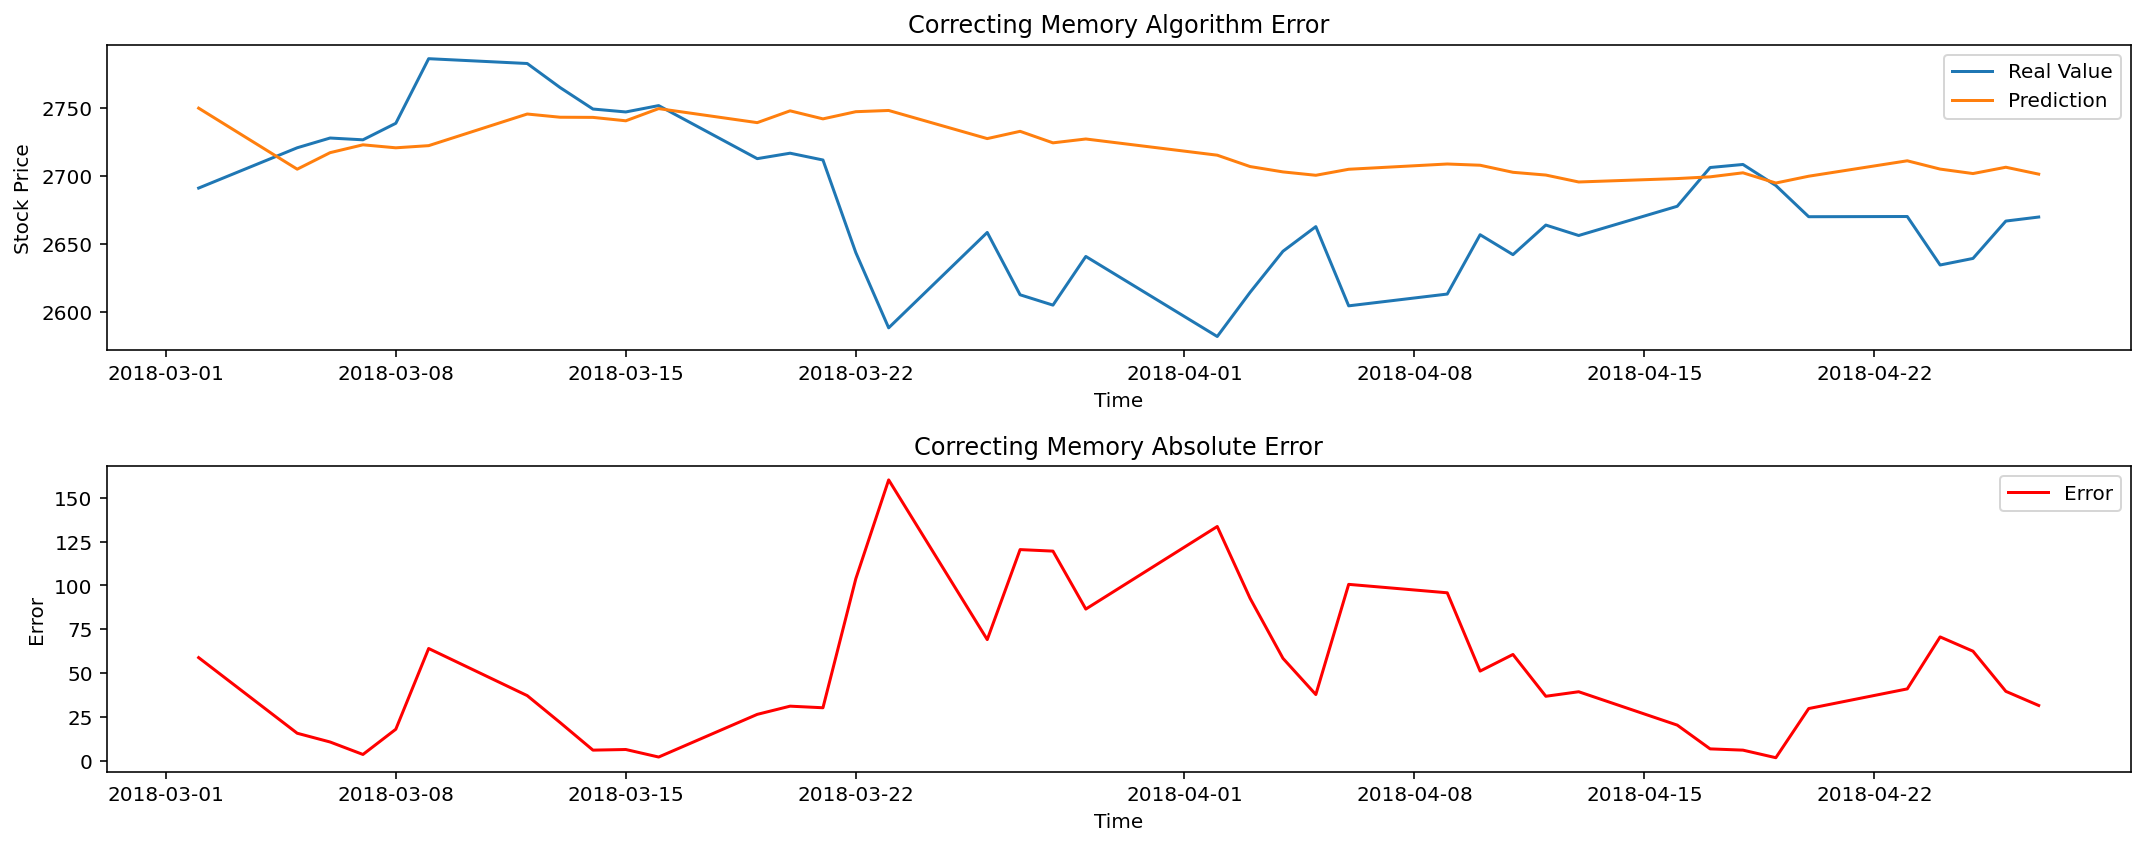

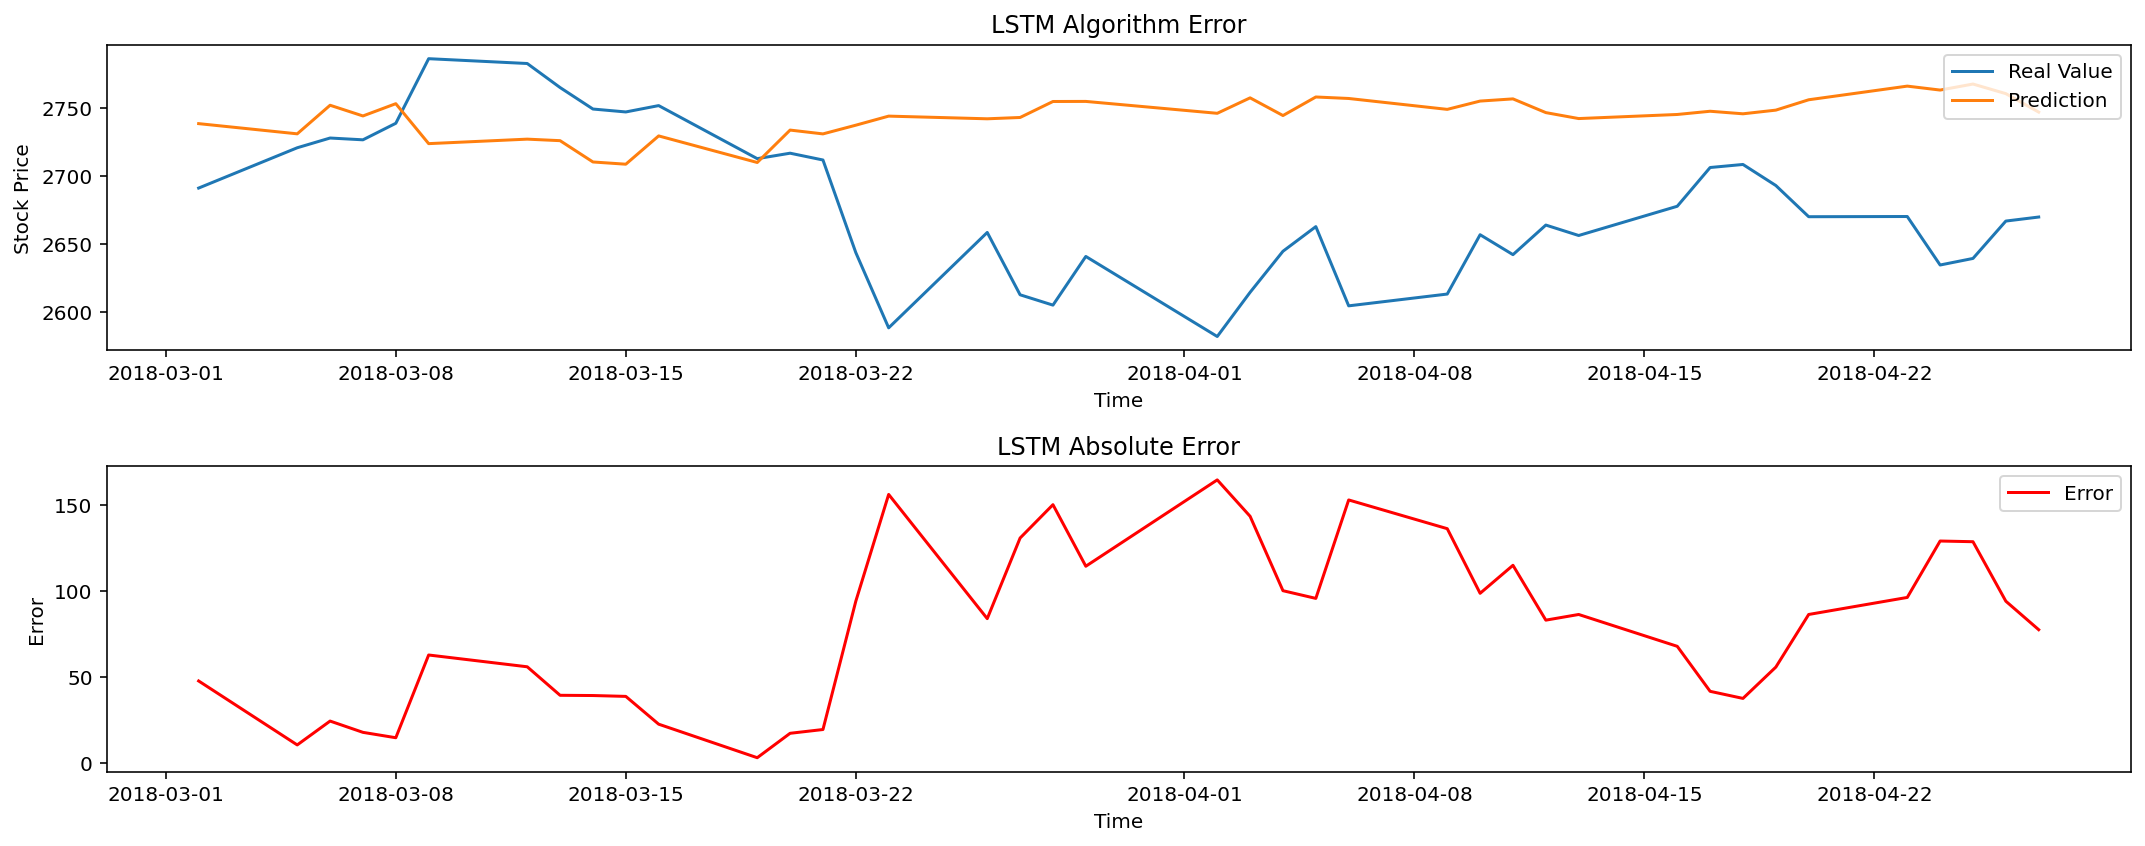

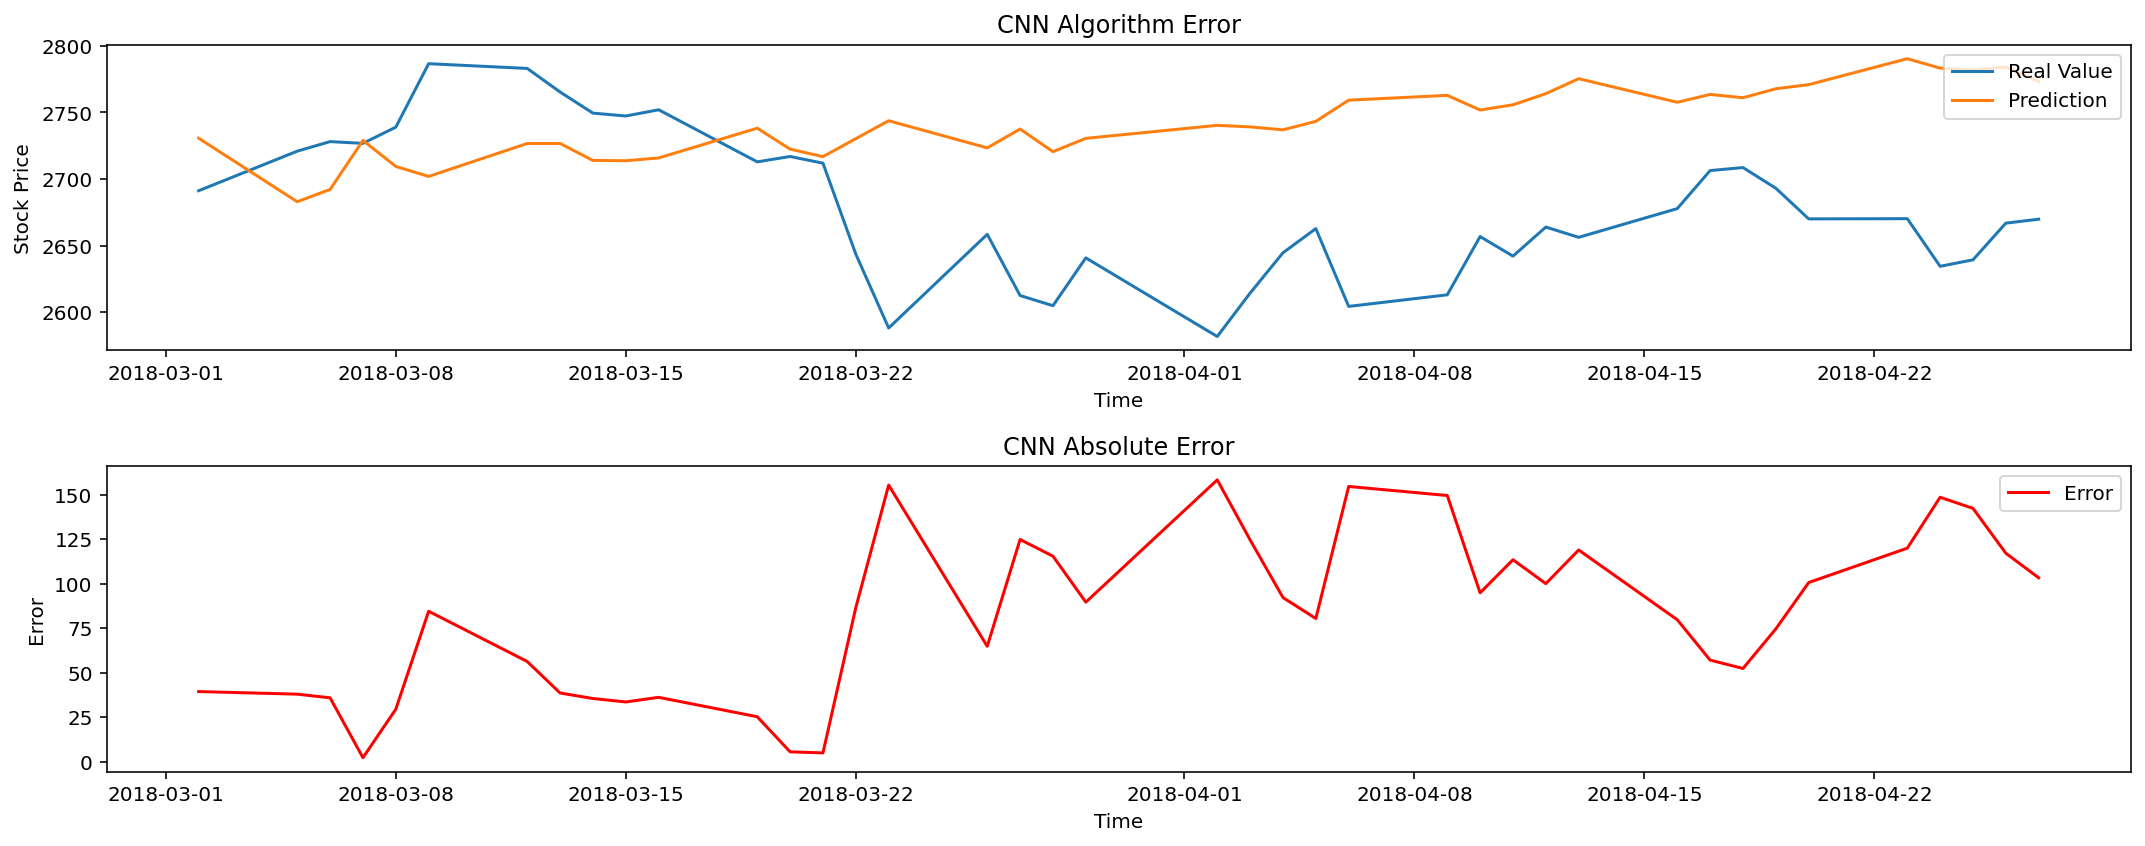

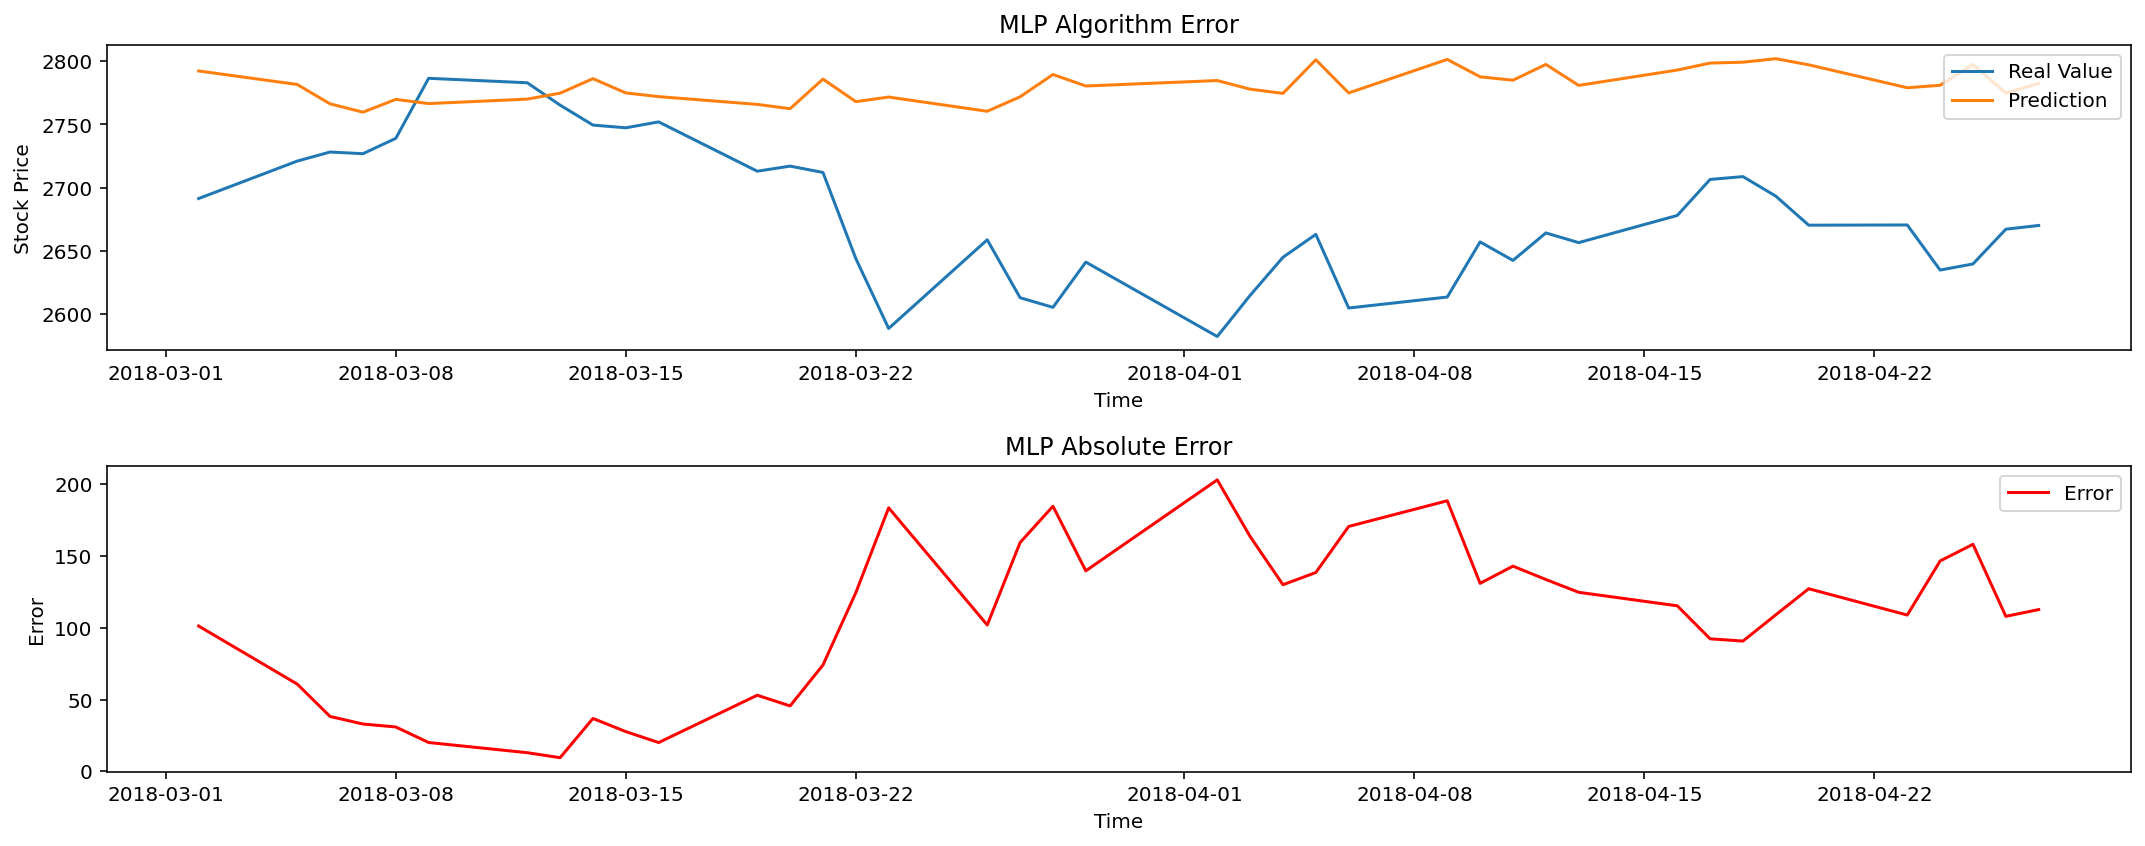

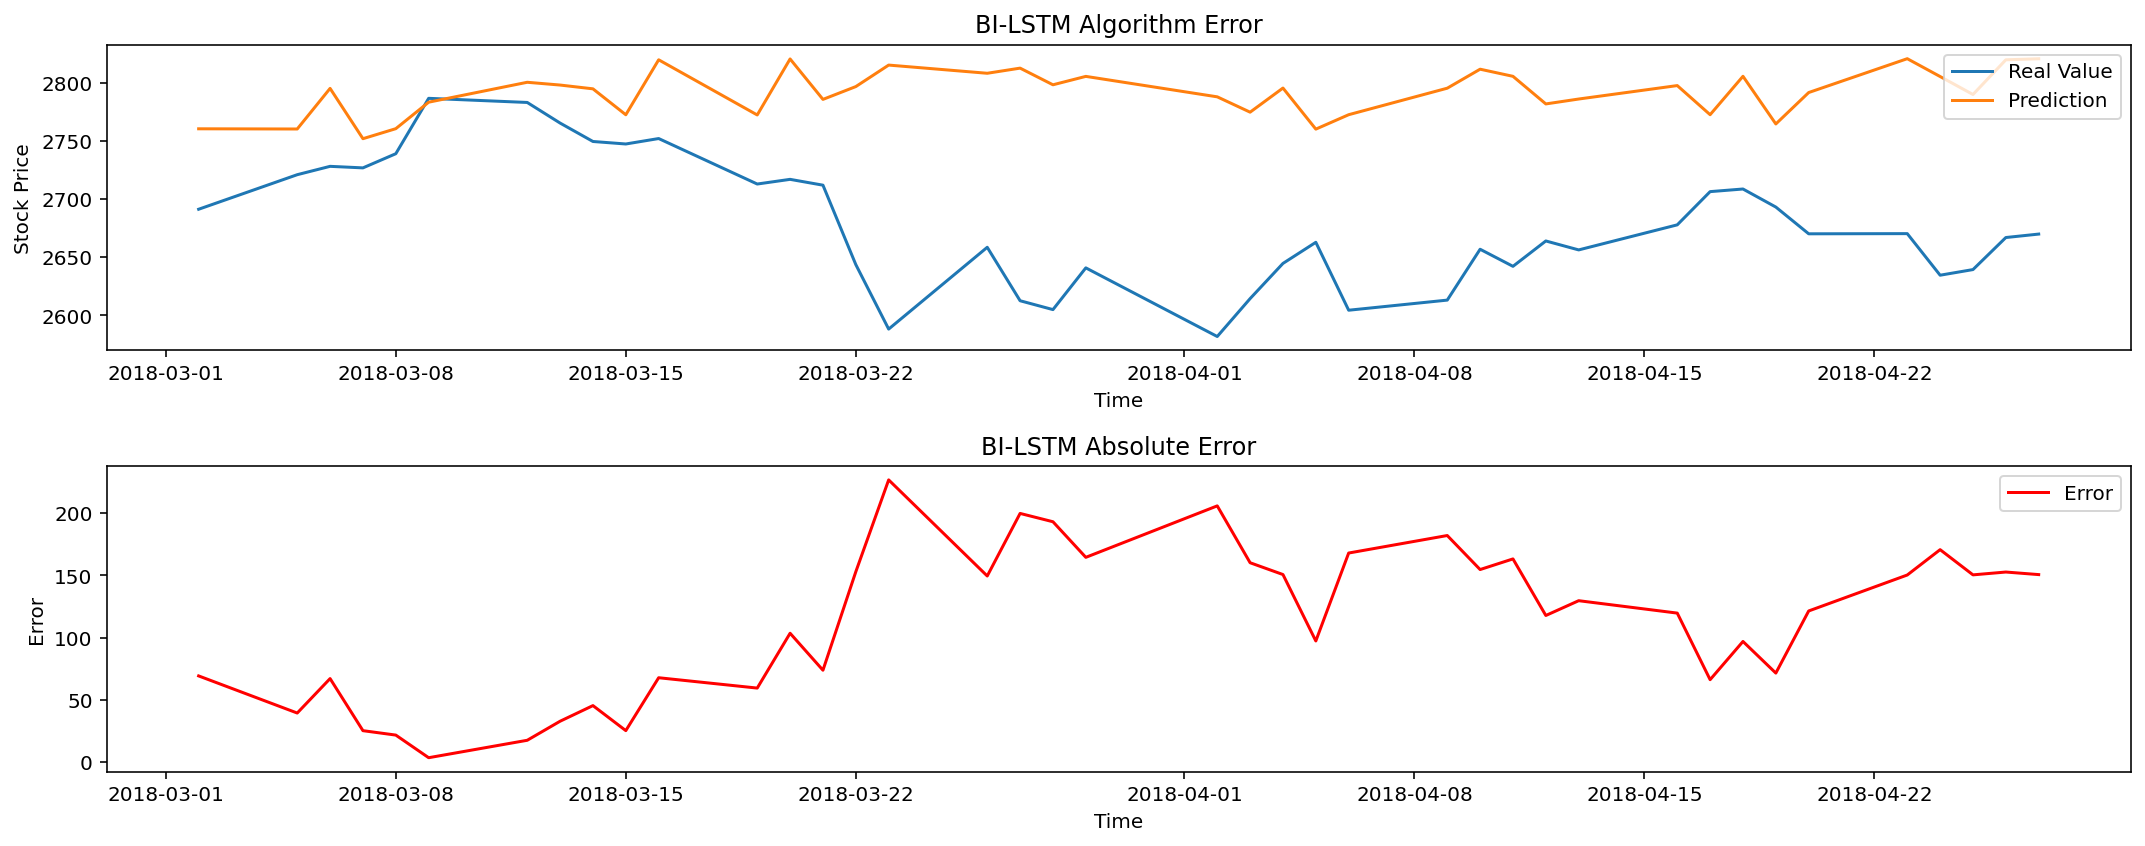

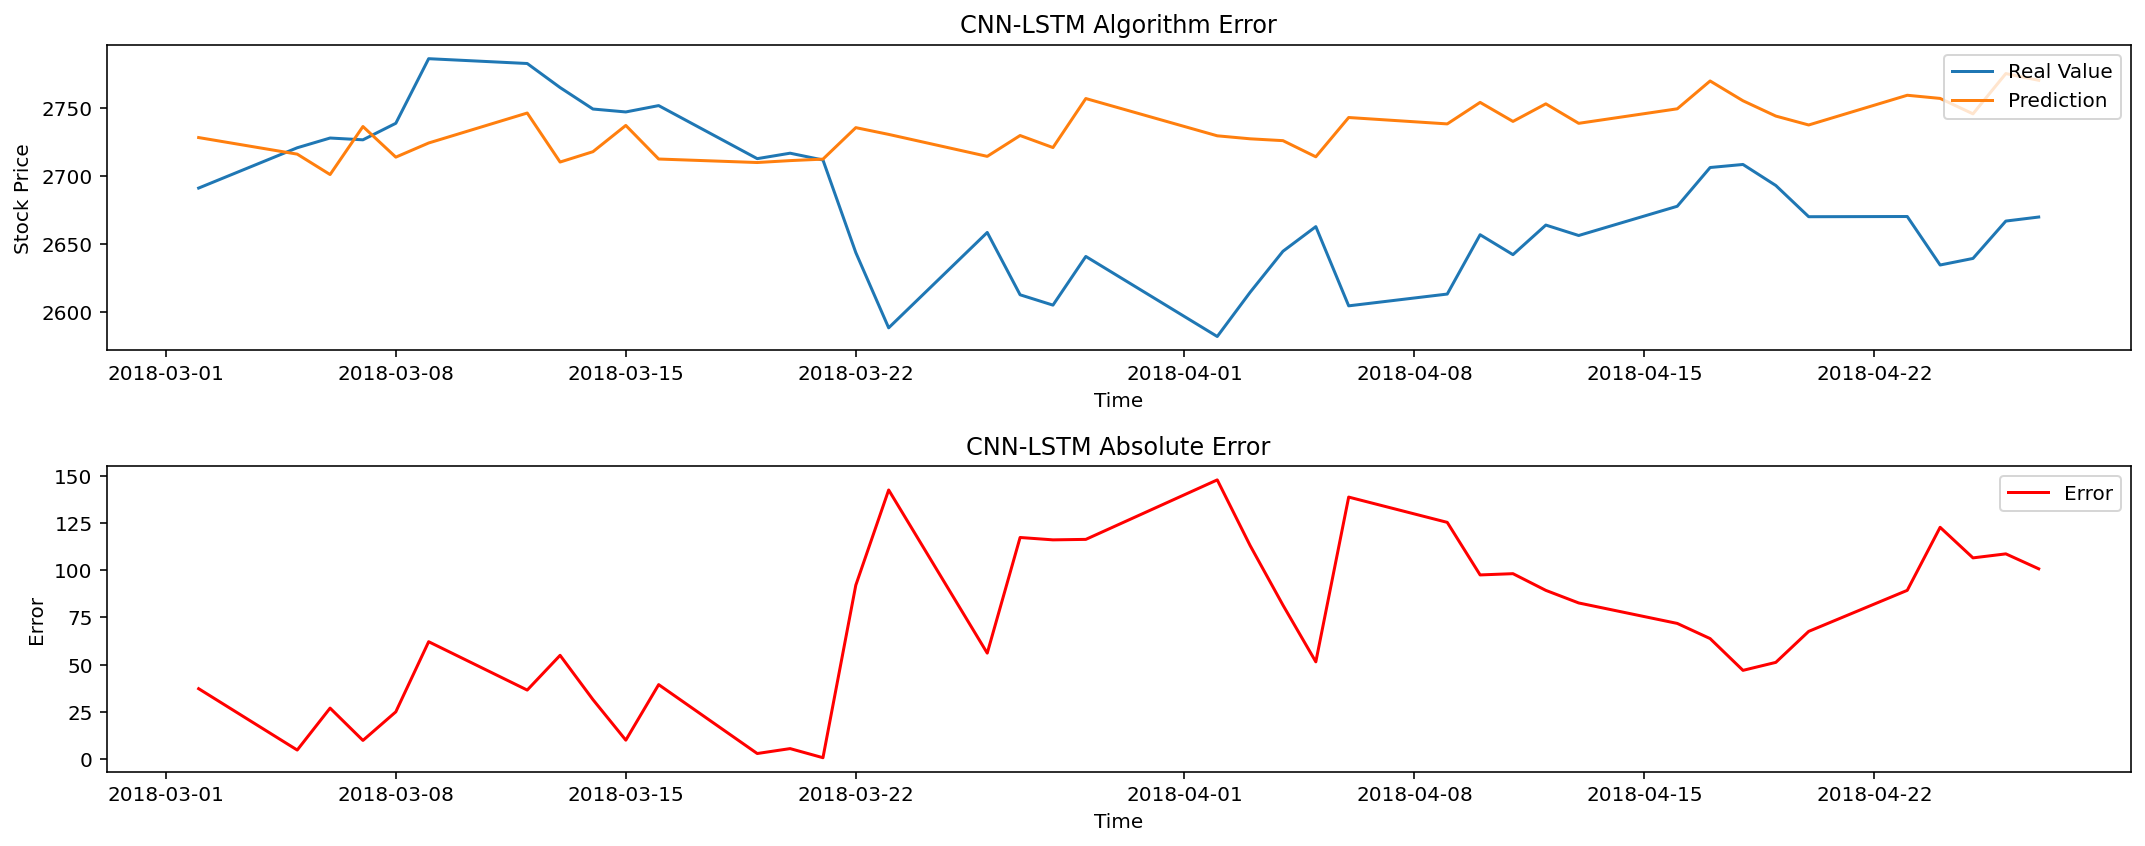

In [287]:
plot_performance(all_forecasts)